# **Exploração e análise de dados de crédito com SQL**

*Esse notebook faz parte do curso SQL para análise de dados da EBAC.*

## Os dados:

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m  = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

## **Exploração de dados:**

A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos a exploração de dados:

**Qual a quantidade de informações temos na nossa base de dados?**

Query:
```sql
SELECT count(*) FROM credito
```

> Reposta: 2564 linhas

**Obs:** A base de dados do link acima contém mais linhas do que a seleção utilizada. Você pode utilizar todas as linhas ou considerar apenas uma fração dos dados. Na prática, quanto maior a quantidade de dados utilizada, mais confiável a análise! Mas existem limites computacionais e financeiros na qual a redução de dados para análise para fins de estudo se torna interessante

**Cómo são os dados:**

Query:
```sql
SELECT * FROM credito LIMIT 10;
```
![Dez primeiras linhas do dataset](https://github.com/marianeneiva/sqlEBAC/blob/main/limit10.png?raw=true)

> É possível reparar que existem algumas informações nulas na tabela (valor na).

**Quais os tipos de cada dado:**

**Query:**
```sql
DESCRIBE credito
```
![Descrição dos tipos de dados](https://github.com/marianeneiva/sqlEBAC/blob/main/describe.png?raw=true)

Agora que ja entendemos quais são os tipos de dados, vamos olhar mais atentamente para as varíaveis que não são numéricas.

**Quais são os tipos de escolaridade disponíveis no dataset?**

**Query:**
```sql
SELECT DISTINCT escolaridade FROM credito
```
![Tipos de escolaridade](https://github.com/marianeneiva/sqlEBAC/blob/main/escolaridade.png?raw=true)

> Os dados contam com vários níveis de escolaridade e é possível perceber que temos valores nulos (na) no dataset, trataremos isso mais tarde!


**Quais são os tipos de estado_civil disponíveis no dataset?**

**Query:**
```sql
SELECT DISTINCT estado_civil  FROM credito
```
![Tipos de estado civil](https://github.com/marianeneiva/sqlEBAC/blob/main/escolaridade.png?raw=true)


> Novamente encontramos valores nulos nos dados de estado civil!

**Quais são os tipos de salario_anual disponíveis no dataset?**

**Query:**
```sql
SELECT DISTINCT salario_anual  FROM credito
```
![Tipos de salario anual](https://github.com/marianeneiva/sqlEBAC/blob/main/salario_anual.png?raw=true)

> Os salários nesse dataset não estão expostas com o valor exato que o cliente ganha. O que está informado é a faixa salarial de cada um. Também contem dados nulos.


**Quais são os tipos de cartão disponíveis no dataset?**

**Query:**
```sql
SELECT DISTINCT tipo_cartao  FROM credito
```
![Tipos de cartão](https://github.com/marianeneiva/sqlEBAC/blob/main/cartao.png?raw=true)

> Aqui vemos que não há necessidade de tratar valores nulos.


## **Análise de dados**

Uma vez que exploramos o dados, buscamos entender quais são as informações que temos no nosso banco de dados e podemos analisar as informações para buscar entender o que está acontecendo no banco de dados.
Para isso vamos fazer algumas perguntas:

**Nesse banco de dados, quantos clientes temos de cada faixa salarial?**

**Query:**
```sql
select count(*), salario_anual from credito group by salario_anual
```
![Quantidade para cada faixa salarial](https://github.com/marianeneiva/sqlEBAC/blob/main/faixa_salarial.png?raw=true)

> a maioria dos clientes dessa base de dados possui um renda menor que 40K e existem 235 clientes que não informaram ou não consta a faixa salarial.
> De certa forma, pode ser interessante para a empresa focar nesse público de mais baixa renda.

**Nesse banco de dados, quantos clientes são homens e quantos são mulheres?**

**Query:**
```sql
select count(*), sexo from credito group by sexo
```

![Quantidade para cada sexo](https://github.com/marianeneiva/sqlEBAC/blob/main/faixa_sexo.png?raw=true)

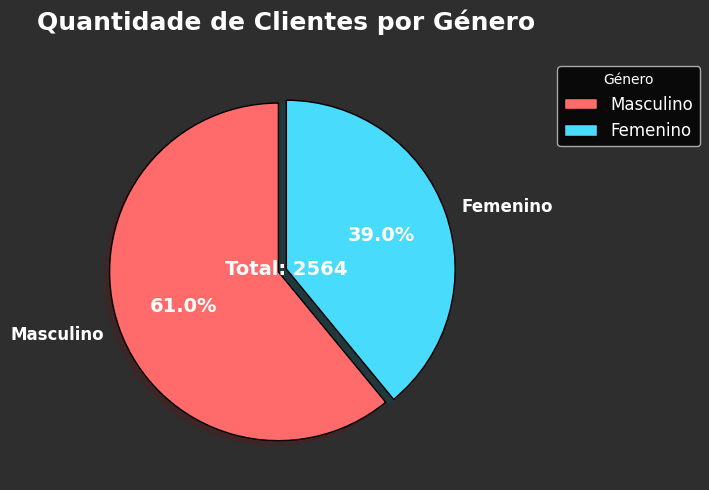

> A maioria dos clientes desse banco é homem! Do csv extraído dos dados é possível gerar um gráfico de pizza para melhor ver a proporção entre Masculino/Feminino;

**Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?**

**Query:**
```sql
select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo
```
![Média de idades por sexo](https://github.com/marianeneiva/sqlEBAC/blob/main/idade_sexopng.png?raw=true)

> Por meio dessa análise não foi possível extrair nenhuma informação relevante.  A menor idade dos dois sexos é a mesma e a média é muito similar. A unica  diferença é a idade máxima, mas fato quase irrelevante pois a diferença não é muito pequena.


**Qual a maior e menor transação dos clientes?**

**Query:**
```sql
select
  min(valor_transacoes_12m) as transacao_minima,
  max(valor_transacoes_12m) as transacao_minima
from credito
```
![Valor transacoes](https://github.com/marianeneiva/sqlEBAC/blob/main/transacoes.png?raw=true)

> Nesse banco de dados temos soma de transações em 12 meses variam de 510.16 a 5776.58

**Quais as características dos clientes que possuem os maiores creditos?**

**Query:**
```sql
select
  max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo
from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by  escolaridade, tipo_cartao, sexo
order by limite_credito desc
limit 10
```

![Valor limite](https://github.com/marianeneiva/sqlEBAC/blob/main/limite_desc.png?raw=true)

> Não parece haver um impacto da escolaridade no limite. O limite mais alto é oferecido para um homem sem educação formal. O cartão também parece não estar relacionado com a escolaridade nem com o limite. Dentre os maiores limites, encontramos clientes com cartão: gold, silver, platinum e blue

**Quais as características dos clientes que possuem os menores creditos?**

**Query:**
```sql
select
  max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo
from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by  escolaridade, tipo_cartao, sexo
order by limite_credito asc
```

![Valor limite](https://github.com/marianeneiva/sqlEBAC/blob/main/limite_asc.png?raw=true)

> Dessa vez conseguimos perceber que não há clientes com cartão platinum dentre os menores limites. Também foi possível perceber que a maioria dos menores limites são mulheres enquanto nos maiores limites predomina homens.

**Será que as mulheres gastam mais?**

**Query:**
```sql
select
  max(valor_transacoes_12m) as maior_valor_gasto,
  avg(valor_transacoes_12m) as  media_valor_gasto,
  min(valor_transacoes_12m) as min_valor_gasto, sexo
from credito
group by sexo
```

![Valor transacoes/sexo](https://github.com/marianeneiva/sqlEBAC/blob/main/quemgastamais.png?raw=true)

> Apesar da diferença nos limites, os gastos de homens e mulheres são similares!


**O salário impacta no limite?**

**Query:**
```sql
select
  avg(qtd_produtos) as qts_produtos,
  avg(valor_transacoes_12m) as media_valor_transacoes,
  avg(limite_credito) as media_limite,  
  sexo,   
  salario_anual
from credito
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(valor_transacoes_12m) desc
```
![Valor salario_anualLimite](https://github.com/marianeneiva/sqlEBAC/blob/main/salarioAnualMediaLimite.png?raw=true)

>SIM! As pessoas que tem menor faixa salarial também apresentam menor limite de credito!


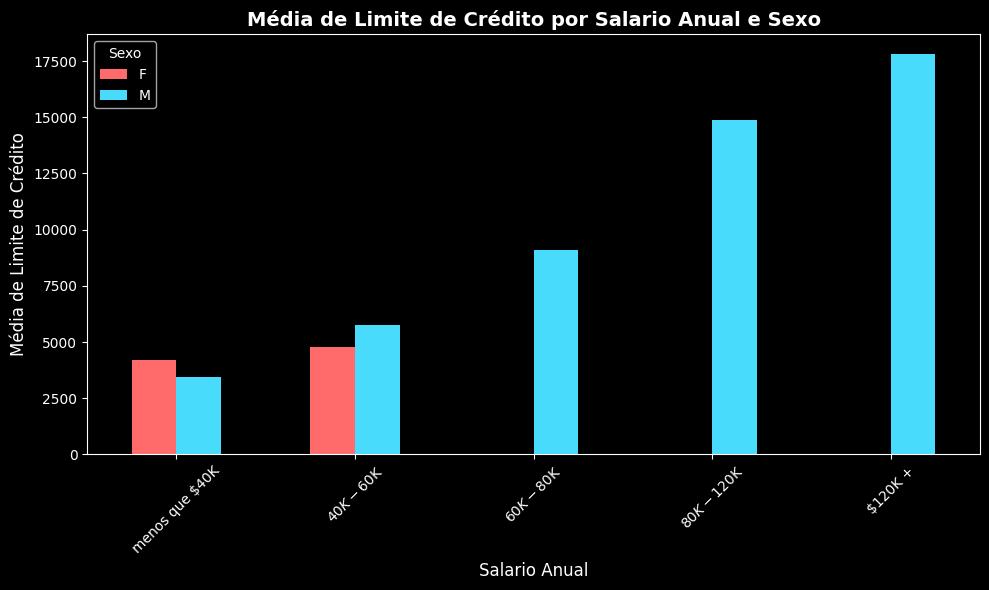

**Segmentação de Clientes por Idade e Limite Médio de Crédito**

**Query:**
```sql
SELECT
    CASE
        WHEN idade BETWEEN 18 AND 30 THEN '18-30'
        WHEN idade BETWEEN 31 AND 45 THEN '31-45'
        WHEN idade BETWEEN 46 AND 60 THEN '46-60'
        ELSE '60+'
    END AS rango_edade,
    AVG(limite_credito) AS media_limite_credito,
    COUNT(*) AS numero_clientes
FROM
    default.credito
GROUP BY
    CASE
        WHEN idade BETWEEN 18 AND 30 THEN '18-30'
        WHEN idade BETWEEN 31 AND 45 THEN '31-45'
        WHEN idade BETWEEN 46 AND 60 THEN '46-60'
        ELSE '60+'
    END
ORDER BY
    rango_edade;
```

>Identificando que os clientes dentre 31 a 45 e de 46 a 60 anos são os grupos demográficos que possuem limites mais altos.

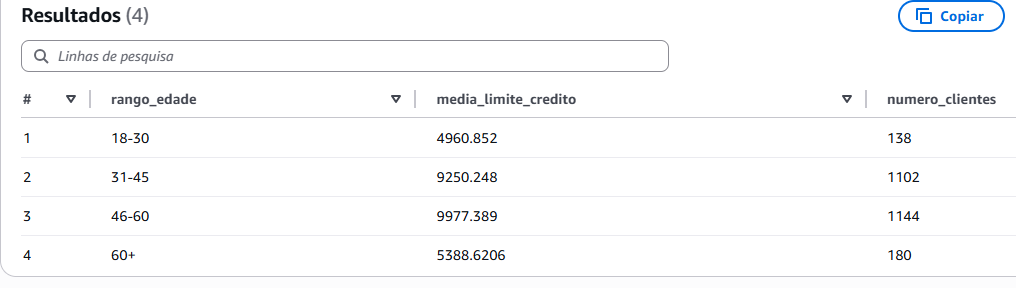

**Clientes com Maior Potencial de Crescimento (Baixo Uso de Transações, Alto Limite de Crédito)**

**Query:**
```sql
SELECT
    idade,
    sexo,
    salario_anual,
    qtd_transacoes_12m,
    limite_credito
FROM
    default.credito
WHERE
    qtd_transacoes_12m < (SELECT AVG(qtd_transacoes_12m) FROM default.credito)
    AND limite_credito > (SELECT AVG(limite_credito) FROM default.credito)
ORDER BY
    limite_credito DESC, qtd_transacoes_12m ASC;
```


>Aquí identificamos 480! clientes com um baixo número de transações (`qtd_transacoes_12m`), mas um alto limite de crédito (`limite_credito`), o que pode indicar potencial para aumentar o uso de crédito ou comprar mais produtos.

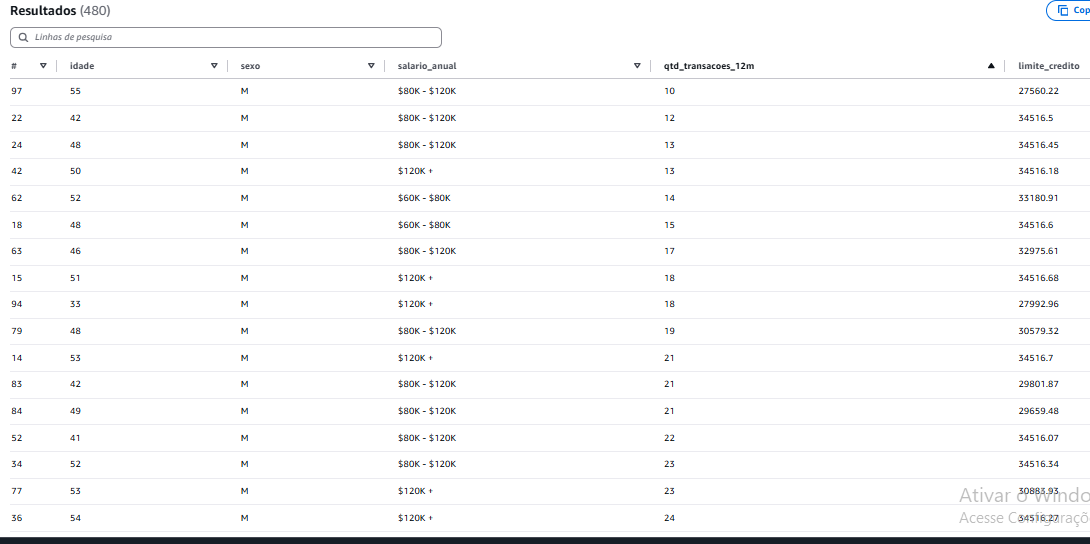



> Graficando a distribuição dos dados da tabela acima podemos observar uma diferença muito gritante entre a grande maioria do sexo Masculino e uma minoria do sexo Femenino. Ou seja que dentro desse grupo os maiores esforços para atrair e vender produtos podem estar claramente melhor direcionados ao publico masculino.



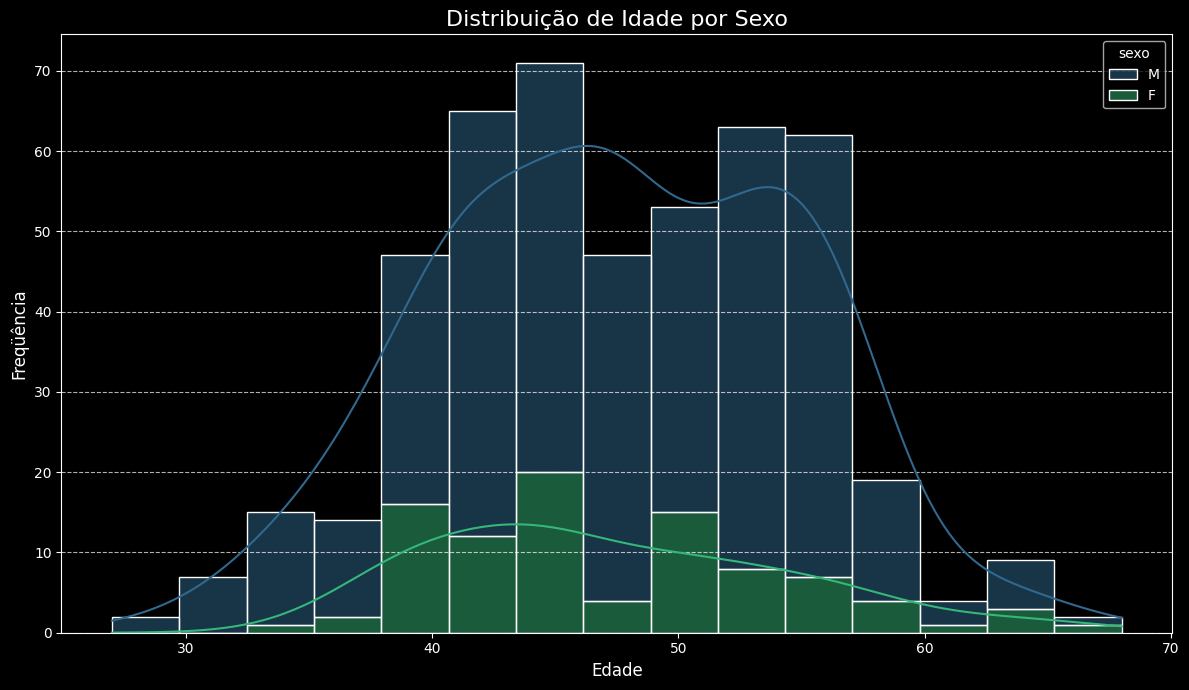

# Conclusão

Essas foram **algumas** análises extraídas do dataset de crédito.  

Alguns insights interessantes:

- a maior parte dos clientes possui renda até 40K
- a maior parte dos clientes é masculino!
- a escolaridade não parece influenciar no limite nem no tipo do cartão
- os clientes com maiores limites são em sua maioria homens
- os clientes com menores limites são em sua maioria mulheres
- dentre os menores limites não há presença de cartão platinum
- a faixa salarial impacta diretamente no limite de crédito
- nao existem clientes com salário anual acima de 60K do sexo feminino
- a maioria dos clientres com maior limite de crédito medio ( entre
9 e 10 mil) tem entre 31 a 60 anos e são homens.
- quase uma quinta parte dos clientes desse dataset tem um alto limíte de crédito e um baixo número de transações.
**Uma exploração maior dos dados pode explicar porque as mulheres tem menor crédito. Isso também pode ser um problema cultural que pode ser repensado!**

